# Machine learning: Coputer vision

- what does it mean to see? what is the differecnce between cat and dog
- random (10% performance)
- liner classification based on pixels
- math review: matrices, log, exp, derrivative, gradient

- neural networks and gradient descent
- cnn

In [2]:
from scipy.misc import imread, imsave, imresize
import matplotlib.pyplot as plt
import numpy as np
from random import randint

# helpers, nothing interesting inside
from cs231nlib.utils import load_CIFAR10;
from cs231nlib.utils import visualize_CIFAR;

print("Hellow world")

Hellow world


In [3]:
# wow efect about comuter vision
# why me: the list of comeplted courses
# show elements
# 2 presentations: 1) basics 2) neural networks and CNN

### What is vision?

/Users/odats/openai/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


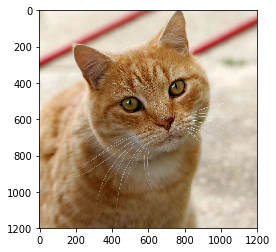

shape: uint8 (1199, 1200, 3)
total numbers: 4316400
first 100 elements from the list [218 209 176 217 208 175 216 207 174 217 208 177 220 211 180 221 212 181
 220 213 184 220 213 184 219 212 184 220 213 185 220 213 187 220 214 188
 221 215 191 222 216 192 222 216 192 223 217 193 225 218 189 225 218 190
 226 219 191 227 220 194 229 221 198 232 224 203 233 225 206 235 226 209
 232 223 208 233 224 209 233 224 209 234 225 210 235 226 209 236 227 210
 237 228 211 238 230 211 238 229 214 239]


In [4]:
img = imread('assets/cat.jpg')

plt.imshow(img)
plt.show()

print("shape:", img.dtype, img.shape)
print("total numbers:", np.prod(np.array(img.shape)))

print("first 100 elements from the list", img.flatten()[:100])

### What do you see?

/Users/odats/openai/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


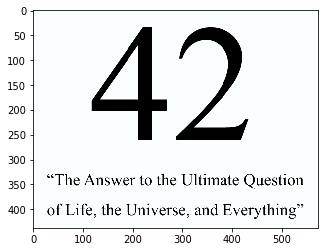

In [5]:
def what_is_this(img):
    plt.imshow(imread('assets/42_Answer.jpg'))
    plt.show()
    
what_is_this(img)

### Define answers space

In [6]:
answers = ['cat', 'dog', 'man']

The task in Image Classification is to predict a single label for a given image. Images are 3-dimensional arrays of integers from 0 to 255, of size Width x Height x 3. The 3 represents the three color channels Red, Green, Blue.

### Challenges

![title](assets/challenges.jpeg)

### Data-driven approach: Input -> Learning -> Evaluation

Example image classification dataset: CIFAR-10. One popular toy image classification dataset is the CIFAR-10 dataset. This dataset consists of 60,000 tiny images that are 32 pixels high and wide. Each image is labeled with one of 10 classes (for example “airplane, automobile, bird, etc”). These 60,000 images are partitioned into a training set of 50,000 images and a test set of 10,000 images. In the image below you can see 10 random example images from each one of the 10 classes:

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


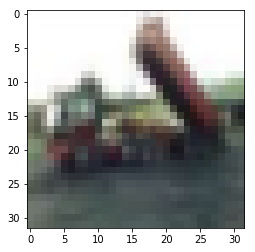

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


def unpickle(file):
 '''Load byte data from file'''
 with open(file, 'rb') as f:
  data = pickle.load(f, encoding='latin-1')
  return data


def load_cifar10_data(data_dir):
 '''Return train_data, train_labels, test_data, test_labels
 The shape of data is 32 x 32 x3'''
 train_data = None
 train_labels = []

 for i in range(1, 6):
  data_dic = unpickle(data_dir + "/data_batch_{}".format(i))
  if i == 1:
   train_data = data_dic['data']
  else:
   train_data = np.vstack((train_data, data_dic['data']))
  train_labels += data_dic['labels']

 test_data_dic = unpickle(data_dir + "/test_batch")
 test_data = test_data_dic['data']
 test_labels = test_data_dic['labels']

 train_data = train_data.reshape((len(train_data), 3, 32, 32))
 train_data = np.rollaxis(train_data, 1, 4)
 train_labels = np.array(train_labels)

 test_data = test_data.reshape((len(test_data), 3, 32, 32))
 test_data = np.rollaxis(test_data, 1, 4)
 test_labels = np.array(test_labels)

 return train_data, train_labels, test_data, test_labels

data_dir = 'data/CIFAR10'

train_data, train_labels, test_data, test_labels = load_cifar10_data(data_dir)

print(train_data.shape)
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)

# In order to check where the data shows an image correctly
plt.imshow(train_data[2])
plt.show()

In [12]:
## load dataset

#Xtr, Ytr, Xte, Yte=load_CIFAR10("data/CIFAR10");
Xtr, Ytr, Xte, Yte=load_cifar10_data(data_dir)

print(Xtr.shape[0])
print(Xtr.shape[1])
print(Xtr.shape[2])
print(Xtr.shape[3])

# flatten out all images to be one-dimensional
Xtr_rows = Xtr.reshape(Xtr.shape[0], 32 * 32 * 3) # Xtr_rows becomes 50000 x 3072
Xte_rows = Xte.reshape(Xte.shape[0], 32 * 32 * 3) # Xte_rows becomes 10000 x 3072
    


50000
32
32
3


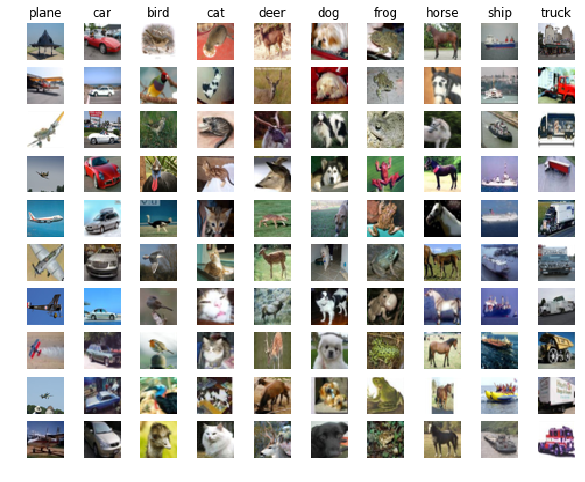

In [13]:
## plot configuration

plt.rcParams['figure.figsize']=(10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

visualize_CIFAR(X_train=Xtr, y_train=Ytr, samples_per_class=10)


def show_image(class_id = 3):
    cat_id = None
    for pos, y in enumerate(Ytr):
        if y == class_id:
            cat_id = pos
            print(cat_id, y)
            break

    plt.figure(figsize=(2,2))
    plt.imshow(Xtr[cat_id].astype('uint8'))
    plt.show()

### Random

In [14]:
class RandomGuess(object):
    def __init__(self):
        pass

    def train(self, X, y):
        self.Xtr = X
        self.ytr = y

    def predict(self, X):
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

        # loop over all test rows
        for i in xrange(num_test):
            Ypred[i] = randint(0, 9)

        return Ypred

In [16]:
rg = RandomGuess() # create a Random guess classifier class
rg.train(Xtr, Ytr) # train the classifier on the training images and labels

Yte_predict = rg.predict(Xte) # predict labels on the test images

# and now print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
print('accuracy: %f' % ( np.mean(Yte_predict == Yte) ))

NameError: name 'xrange' is not defined

###  Nearest Neighbor Classifier

<br>
<center>$d_1 (I_1, I_2) = \sum_{p} \left| I^p_1 - I^p_2 \right|$</center>
<br>
<br>

***

![title](assets/nneg.jpeg)

In [ ]:
class NearestNeighbor(object):
    def __init__(self):
        pass

    def train(self, X, y):
        """ X is N x D where each row is an example. Y is 1-dimension of size N """
        # the nearest neighbor classifier simply remembers all the training data
        self.Xtr = X
        self.ytr = y

    def predict(self, X):
        """ X is N x D where each row is an example we wish to predict label for """
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

        # loop over all test rows
        for i in xrange(num_test):
            # find the nearest training image to the i'th test image
            # using the L1 distance (sum of absolute value differences)
            distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)          
            min_index = np.argmin(distances) # get the index with smallest distance
            Ypred[i] = self.ytr[min_index] # predict the label of the nearest example

        return Ypred

In [ ]:
def test_NearestNeighbor(Xtr_rows, Ytr, Xte_rows, Yte):    
    nn = NearestNeighbor() # create a Nearest Neighbor classifier class
    nn.train(Xtr_rows, Ytr) # train the classifier on the training images and labels

    Yte_predict = nn.predict(Xte_rows) # predict labels on the test images

    # and now print the classification accuracy, which is the average number
    # of examples that are correctly predicted (i.e. label matches)
    print 'accuracy: %f' % ( np.mean(Yte_predict == Yte) )
    
    
test_NearestNeighbor(Xtr_rows[:5000], Ytr[:5000], Xte_rows[:1000], Yte[:1000])

### k - Nearest Neighbor Classifier
<br>
Instead of finding the single closest image in the training set, we will find the top k closest images, and have them vote on the label of the test image. Leading to better generalization on the test data
![title](assets/knn.jpeg)

What is the best K? Hyperparameter tuning idea.

Split your training set into training set and a validation set. Use validation set to tune all hyperparameters. At the end run a single time on the test set and report performance.

In [ ]:
class KNearestNeighbor(object):
    def __init__(self):
        pass

    def train(self, X, y):
        """ X is N x D where each row is an example. Y is 1-dimension of size N """
        # the nearest neighbor classifier simply remembers all the training data
        self.Xtr = X
        self.ytr = y    
    
    def predict(self, X, k=10):
        """ X is N x D where each row is an example we wish to predict label for """
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

        # loop over all test rows
        for i in xrange(num_test):
            # find the nearest training image to the i'th test image
            # using the L1 distance (sum of absolute value differences)
            distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)  
            
            list_of_indexes = []
            for k_item in xrange(k):
                min_index = np.argmin(distances)
                list_of_indexes.append(min_index)
                
                # do not use this index anymore
                distances[min_index] = distances[np.argmax(distances)]
                
            classes = []
            for min_index in list_of_indexes:
                classes.append(self.ytr[min_index])

            Ypred[i] = np.bincount(classes).argmax()

        return Ypred

In [ ]:
def find_k_KNearestNeighbor(Xtr_rows, Ytr, Xte_rows, Yte):
    Xval_rows = Xtr_rows[:1000] # take first 1000 for validation
    Yval = Ytr[:1000]
    Xtr_rows = Xtr_rows[1000:2000] # keep last 49,000 for train
    Ytr = Ytr[1000:2000]

    # find hyperparameters that work best on the validation set
    for k in [1, 3, 5, 10, 20, 50, 100]:  
        # use a particular value of k and evaluation on validation data
        nn = KNearestNeighbor()
        nn.train(Xtr_rows, Ytr)
        # here we assume a modified NearestNeighbor class that can take a k as input
        Yval_predict = nn.predict(X = Xval_rows, k = k)
        acc = np.mean(Yval_predict == Yval)
        print('K value:', k)
        print 'accuracy: %f' % (acc,)
        
find_k_KNearestNeighbor(Xtr_rows, Ytr, Xte_rows, Yte)

In [ ]:
def test_k_KNearestNeighbor(Xtr_rows, Ytr, Xte_rows, Yte, k=1):    
    nn = KNearestNeighbor() # create a Nearest Neighbor classifier class
    nn.train(Xtr_rows, Ytr) # train the classifier on the training images and labels

    Yte_predict = nn.predict(X = Xte_rows, k = k) # predict labels on the test images

    # and now print the classification accuracy, which is the average number
    # of examples that are correctly predicted (i.e. label matches)
    print 'accuracy: %f' % ( np.mean(Yte_predict == Yte) )
        
test_k_KNearestNeighbor(Xtr_rows[:5000], Ytr[:5000], Xte_rows[:1000], Yte[:1000], k=20)

#### Disadvantages:
1) The classifier must remember all of the training data and store it for future comparisons with the test data. This is space inefficient because datasets may easily be gigabytes in size.

2) Classifying a test image is expensive since it requires a comparison to all training images.

### Linear Classification
Score function - that maps the raw data to class scores

Loss function - that quantifies the agreement between the predicted scores and the ground truth labels

Objective - optimization problem in which we will minimize the loss function with respect to the parameters of the score function

<br>
<center>$f(x_i, W, b) =  W x_i + b$</center>
<br>

***

![title](assets/imagemap.jpg)


Analogy of images as high-dimensional points. Since the images are stretched into high-dimensional column vectors, we can interpret each image as a single point in this space (e.g. each image in CIFAR-10 is a point in 3072-dimensional space of 32x32x3 pixels). Analogously, the entire dataset is a (labeled) set of points.

![title](assets/pixelspace.jpeg)

***
Interpretation of linear classifiers as template matching.
![title](assets/templates.jpg)

### Bias trick (skip)

$f(x_i, W, b) =  W x_i + b$ change to $f(x_i, W) =  W x_i$


With our CIFAR-10 example, xixi is now [3073 x 1] instead of [3072 x 1] - (with the extra dimension holding the constant 1), and WW is now [10 x 3073] instead of [10 x 3072]. The extra column that W now corresponds to the bias b

![title](assets/wb.jpeg)

### Loss function
Multiclass Support Vector Machine: SVM “wants” the correct class for each image to a have a score higher than the incorrect classes by some fixed margin Δ.

<center>$L_i = \sum_{j\neq y_i} \max(0, s_j - s_{y_i} + \Delta)$</center>

Example. Lets unpack this with an example to see how it works. Suppose that we have three classes that receive the scores s=[13,−7,11]s=[13,−7,11], and that the first class is the true class (i.e. yi=0yi=0). Also assume that Δ (a hyperparameter we will go into more detail about soon) is 10. The expression above sums over all incorrect classes (j≠yij≠yi), so we get two terms:

$L_i = \max(0, -7 - 13 + 10) + \max(0, 11 - 13 + 10)$

You can see that the first term gives zero since [-7 - 13 + 10] gives a negative number, which is then thresholded to zero with the max(0,−)max(0,−) function. We get zero loss for this pair because the correct class score (13) was greater than the incorrect class score (-7) by at least the margin 10. In fact the difference was 20, which is much greater than 10 but the SVM only cares that the difference is at least 10; Any additional difference above the margin is clamped at zero with the max operation. The second term computes [11 - 13 + 10] which gives 8. That is, even though the correct class had a higher score than the incorrect class (13 > 11), it was not greater by the desired margin of 10. The difference was only 2, which is why the loss comes out to 8 (i.e. how much higher the difference would have to be to meet the margin). In summary, the SVM loss function wants the score of the correct class yiyi to be larger than the incorrect class scores by at least by Δ (delta). If this is not the case, we will accumulate loss.

In [ ]:
def L_i_vectorized(x, y, W):
    """
    A faster half-vectorized implementation. half-vectorized
    refers to the fact that for a single example the implementation contains
    no for loops, but there is still one loop over the examples (outside this function)
    """
    delta = 1.0
    scores = W.dot(x)
    # compute the margins for all classes in one vector operation
    margins = np.maximum(0, scores - scores[y] + delta)
    # on y-th position scores[y] - scores[y] canceled and gave delta. We want
    # to ignore the y-th position and only consider margin on max wrong class
    margins[y] = 0
    loss_i = np.sum(margins)
    return loss_i

def L(X, y, W):
    """
    fully-vectorized implementation :
    - X holds all the training examples as columns (e.g. 3073 x 50,000 in CIFAR-10)
    - y is array of integers specifying correct class (e.g. 50,000-D array)
    - W are weights (e.g. 10 x 3073)
    """
    
    loss = np.zeros(X.shape)
    
    for i in xrange(len(loss)):
        loss_i = L_i_vectorized(X[i], y[i], W)
        loss[i] = loss_i
        
    return np.sum(loss)

#### Regularization

Suppose that we have a dataset and a set of parameters W that correctly classify every example. The issue is that this set of W is not necessarily unique: there might be many similar W that correctly classify the examples. One easy way to see this is that if some parameters W correctly classify all examples (so loss is zero for each example), then any multiple of these parameters λW where λ>1 will also give zero loss because this transformation uniformly stretches all score magnitudes and hence also their absolute differences.

<br> 
<center>$R(W) = \sum_k\sum_l W_{k,l}^2$<center>
<br>    
    
The most appealing property is that penalizing large weights tends to improve generalization, because it means that no input dimension can have a very large influence on the scores all by itself. For example, suppose that we have some input vector x=[1,1,1,1] and two weight vectors w1=[1,0,0,0], w2=[0.25,0.25,0.25,0.25]. Then wT1x=wT2x=1 so both weight vectors lead to the same dot product, but the L2 penalty of w1 is 1.0 while the L2 penalty of w2 is only 0.25

<br> 
<center>$L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \lambda R(W) }_\text{regularization loss} \\\\
$<center>
<br> 

### Softmax classifier

In the Softmax classifier, the function mapping f(xi;W)=Wxi stays unchanged, but we now interpret these scores as the unnormalized log probabilities for each class and replace the hinge loss with a cross-entropy loss that has the form:

<center>$L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) \hspace{0.5in}$<center>
    
    
$f_j(z) = \frac{e^{z_j}}{\sum_k e^{z_k}}$ : softmax function. It takes a vector of arbitrary real-valued scores (in z) and squashes it to a vector of values between zero and one that sum to one.

In [ ]:
f = np.array([1, 3, 1])
p = np.exp(f) / np.sum(np.exp(f))
print p
print np.sum(p)
print -np.log(p)

#### Big numbers

In [ ]:
f = np.array([123, 456, 789]) # example with 3 classes and each having large scores
# p = np.exp(f) / np.sum(np.exp(f)) # Bad: Numeric problem, potential blowup

# instead: first shift the values of f so that the highest number is 0:
f -= np.max(f) # f becomes [-666, -333, 0]
p = np.exp(f) / np.sum(np.exp(f)) # safe to do, gives the correct answer

print p
print np.sum(p)

### Optimization

we can generate a random weight matrix W (which corresponds to a single point in the space), then march along a ray and record the loss function value along the way. That is, we can generate a random direction W_1 and compute the loss along this direction by evaluating L(W + a W_1) for different values of a. This process generates a simple plot with the value of a as the x-axis and the value of the loss function as the y-axis. We can also carry out the same procedure with two dimensions by evaluating the loss L(W + a W_1 + b W_2) as we vary a, b. In a plot, a, b could then correspond to the x-axis and the y-axis, and the value of the loss function can be visualized with a color:


![title](assets/loss_chart.png)

In [ ]:
class LinearClassification(object):
    def __init__(self):
        pass

    def train(self, X, y):
          
        W = 2*np.random.random((10,X.shape[1])) - 1 # randon weights
        W_1 = 2*np.random.random((10,X.shape[1])) - 1 # randon directions
        self.W_final = W
        self.loss_final = float("inf") # Python assigns the highest possible float value

        print self.W_final[0]
        print np.mean(self.W_final)
        
        # train
        for step in xrange(10):
            loss = []
            alpha = 2*np.random.random() - 1
            
            W_temp = None
            for j, X in enumerate(Xtr_rows):
                W_temp = W + alpha*W_1 
                loss.append(L_i_vectorized(Xtr_rows[j], Ytr[j], W_temp))

            print("training results:", alpha, np.mean(loss))
            
            if self.loss_final > np.mean(loss):
                self.W_final = W_temp
                self.loss_final = np.mean(loss)
                print("we guess a new W")

    def predict(self, X):
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test)

        # loop over all test rows
        for i in xrange(num_test):
            scores = self.W_final.dot(X[i])
            max_index = np.argmax(scores)
            Ypred[i] = max_index

        return Ypred
    
    
rg = LinearClassification() # create a Random guess classifier class
rg.train(Xtr_rows[:5000], Ytr[:5000]) # train the classifier on the training images and labels

Yte_predict = rg.predict(Xte_rows) # predict labels on the test images

# and now print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
print 'accuracy: %f' % ( np.mean(Yte_predict == Yte) )

In [ ]:
print(rg.loss_final)

In [ ]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()  

def my_formula(x):
    return x**2+2*x+4

graph(my_formula, range(-10, 11))

## Gradient

<center>$\frac{df(x)}{dx} = \lim_{h\ \to 0} \frac{f(x + h) - f(x)}{h}$</center>

In [ ]:
def eval_numerical_gradient(f, x):
    """ 
    a naive implementation of numerical gradient of f at x 
    - f should be a function that takes a single argument
    - x is the point (numpy array) to evaluate the gradient at
    """ 

    fx = f(x) # evaluate function value at original point
    grad = np.zeros(x.shape)
    h = 0.00001

    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        old_value = x[ix]
        x[ix] = old_value + h # increment by h
        fxh = f(x) # evalute f(x + h)
        x[ix] = old_value # restore to previous value (very important!)

        # compute the partial derivative
        grad[ix] = (fxh - fx) / h # the slope
        it.iternext() # step to next dimension

    return grad

In [ ]:
# to use the generic code above we want a function that takes a single argument
# (the weights in our case) so we close over X_train and Y_train
def CIFAR10_loss_fun(W):
    return L(Xtr_rows[:1000], Ytr[:1000], W)

W = np.random.rand(10, 3072) * 0.001 # random weight vector
df = eval_numerical_gradient(CIFAR10_loss_fun, W) # get the gradient

In [ ]:
loss_original = CIFAR10_loss_fun(W) # the original loss
print 'original loss: %f' % (loss_original, )

# lets see the effect of multiple step sizes
for step_size_log in [-10, -9, -8, -7, -6, -5,-4,-3,-2,-1]:
    step_size = 10 ** step_size_log
    W_new = W - step_size * df # new position in the weight space
    loss_new = CIFAR10_loss_fun(W_new)
    print 'for step size %f new loss: %f' % (step_size, loss_new)

In [ ]:
def CIFAR10_loss_fun(W):
    data_batch = np.random.choice(len(Xtr_rows), 32, replace=False)
    
    return L(Xtr_rows[data_batch], Ytr[data_batch], W)

weights = np.random.rand(10, 3072) * 0.001
step_size = 0.000001
for i in xrange(100):
    df = eval_numerical_gradient(CIFAR10_loss_fun, weights) 
    weights += - step_size * df  
    
    # test results:
    num_test = 100
    Ypred = np.zeros(num_test)
    for i in xrange(num_test):
        scores = weights.dot(Xte_rows[i])
        max_index = np.argmax(scores)
        Ypred[i] = max_index

    print 'accuracy: %f' % ( np.mean(Ypred == Yte[:num_test]) )
    
    